<a href="https://colab.research.google.com/github/umamahabbasi24/heart-disease/blob/main/Heart_Disease_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Heart Disease Prediction using Machine Learning

## Introduction

Heart disease is one of the leading causes of death worldwide. Early detection and prevention can significantly reduce the risk and impact of this life-threatening condition. In this project, we aim to build a machine learning model that can predict the likelihood of heart disease based on various clinical features.

Using a publicly available heart disease dataset, we will:

- Perform exploratory data analysis (EDA)
- Preprocess and clean the data
- Train a classification model (Logistic Regression or Decision Tree).
- Evaluate using metrics: accuracy, ROC curve, and confusion matrix.
- Predict the presence or absence of heart disease in patients

This notebook is implemented on **Google Colab**, utilizing Python libraries such as `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn`.

Let’s begin our journey into building a reliable model for heart disease prediction!


In [ ]:
# Imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.mlab as mlab
from sklearn.dummy import DummyClassifier
%matplotlib inline


# import pickle

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# opendatasets to load dataset directly from kaggle
!pip install opendatasets
import opendatasets as od

In [ ]:
# Using od to downlaod and datset directly into the colab notebook
od.download("https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: muhammadar313
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset


100%|██████████| 58.0k/58.0k [00:00<00:00, 214MB/s]

In [ ]:
# Reading through datatset
heart_df = pd.read_csv('/content/framingham-heart-study-dataset/framingham.csv')
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# *Eplore the data*


In [ ]:
heart_df.shape, heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


((4240, 16), None)

In [ ]:
heart_df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## MIssing Values

In [ ]:
heart_df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')


Total number of rows with missing values is  582
since it is only 14 percent of the entire dataset the rows with missing values are excluded.


In [ ]:
heart_df.dropna(axis=0,inplace=True)


# EDA

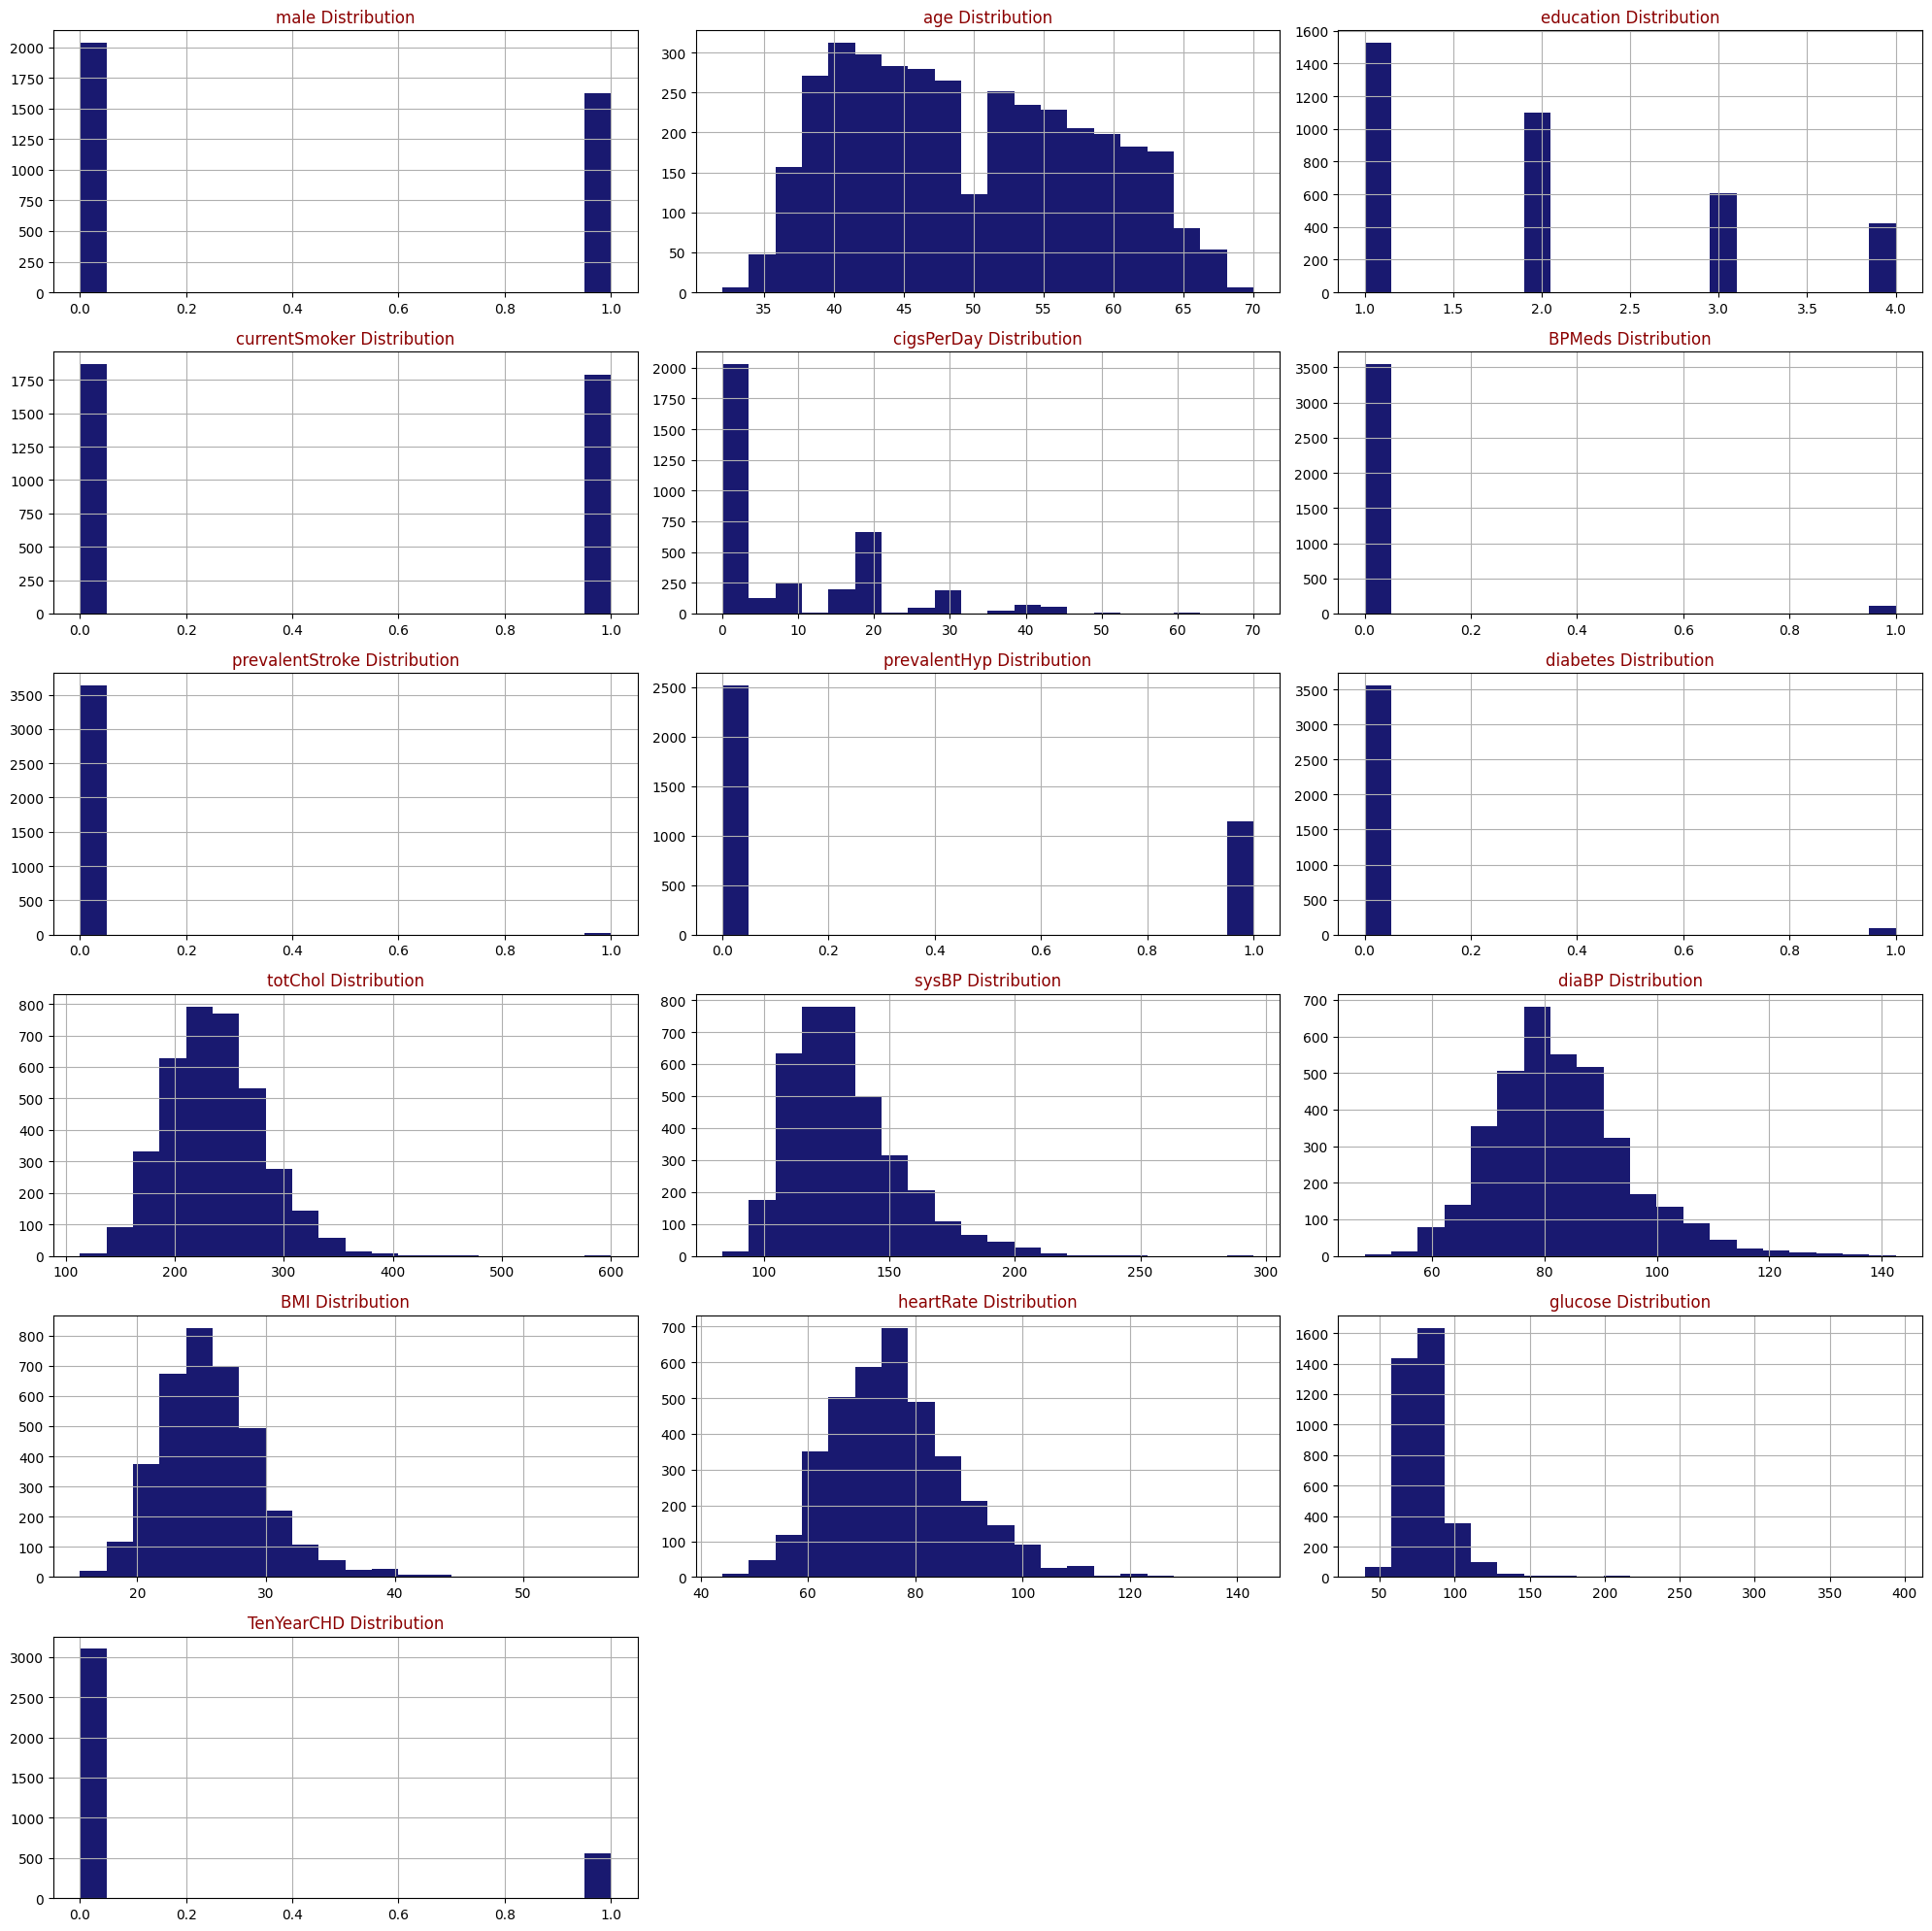

In [ ]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [ ]:
heart_df.TenYearCHD.value_counts()

,count
TenYearCHD,
0,3101
1,557


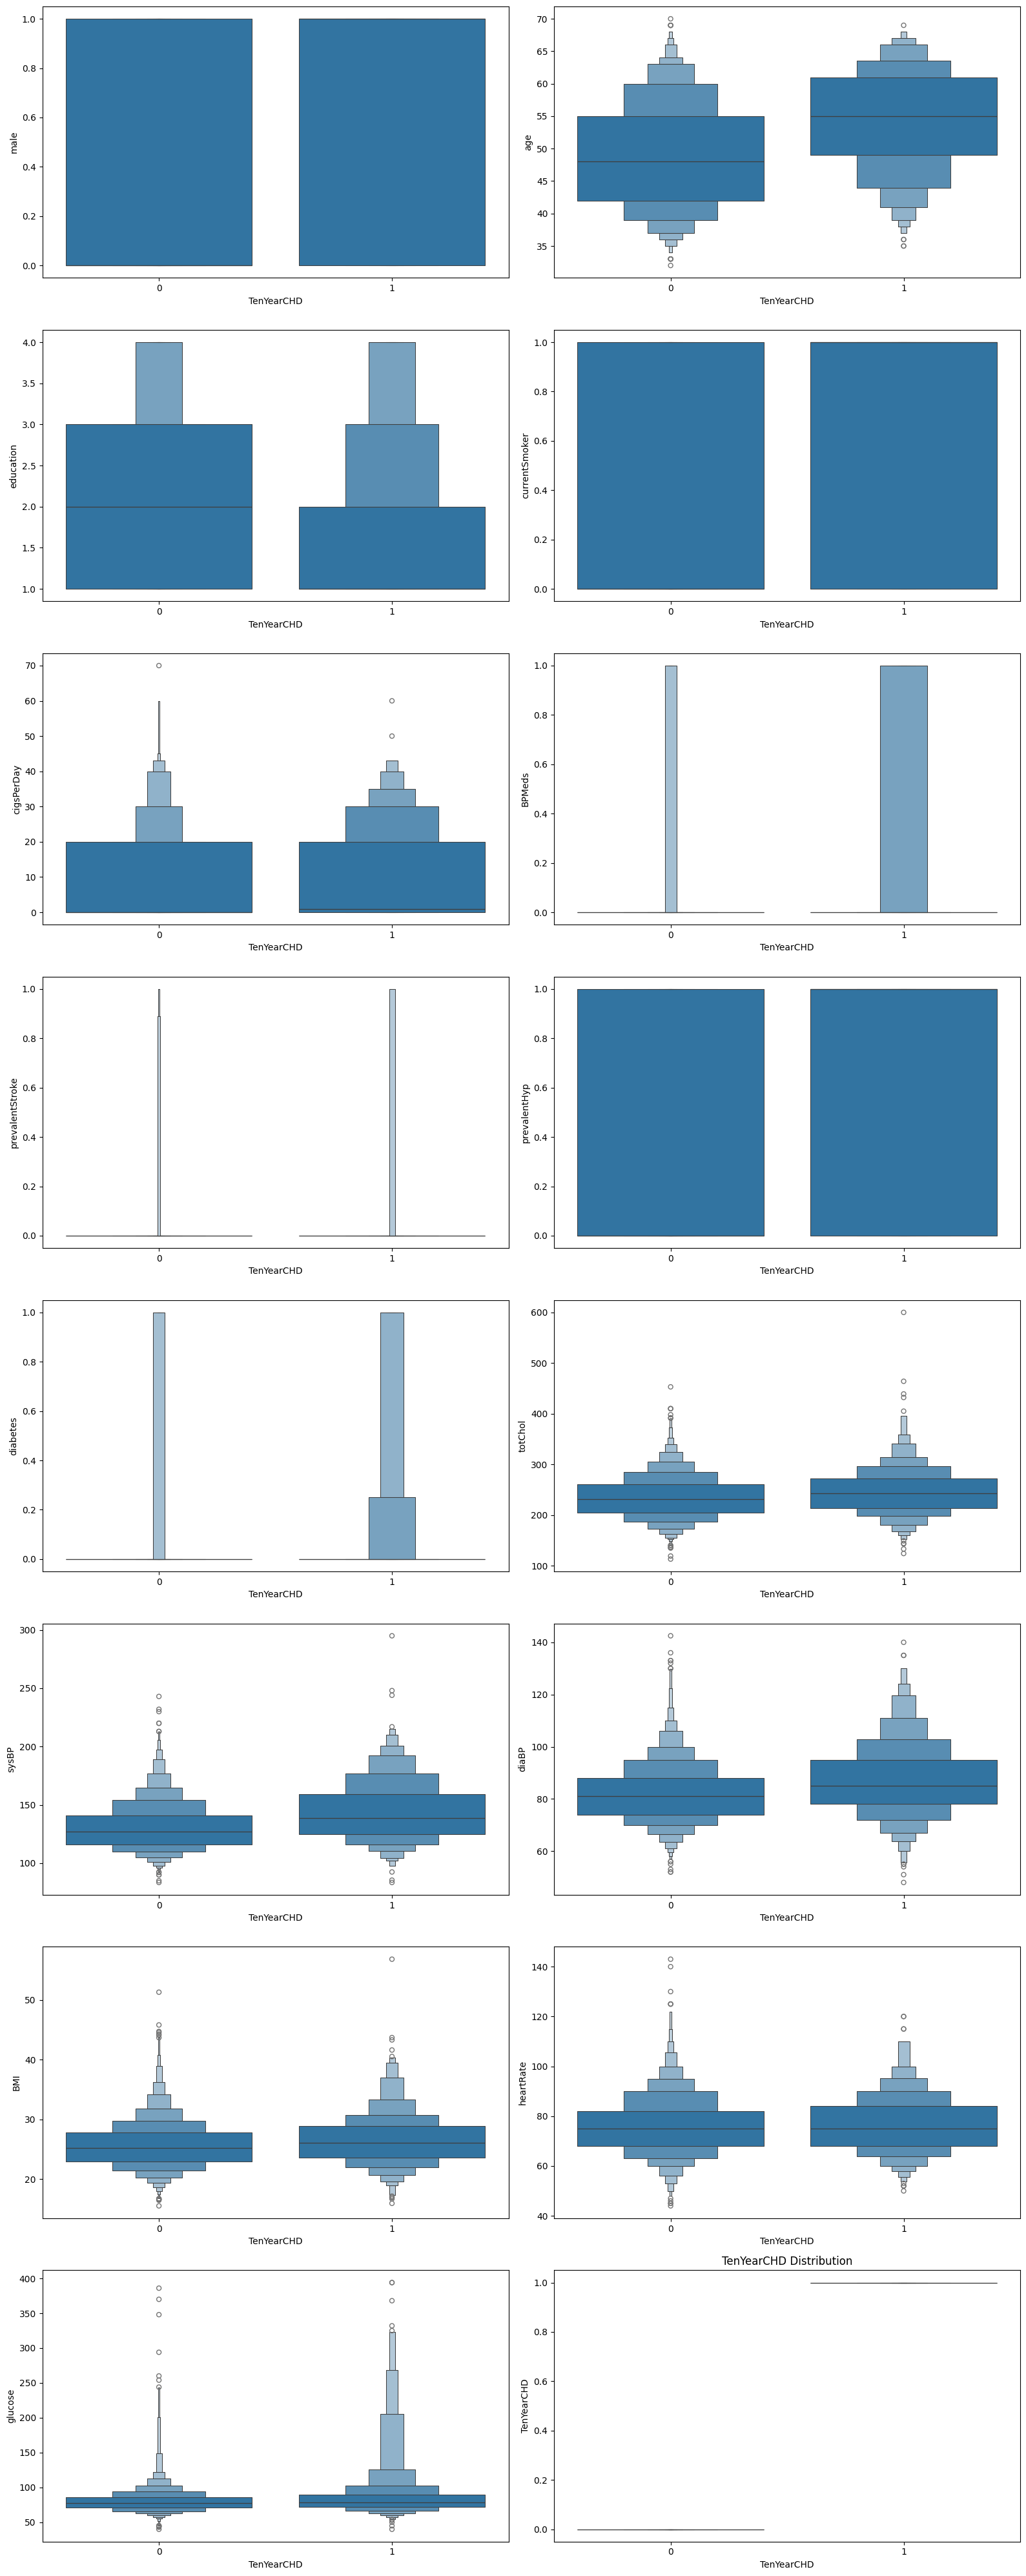

In [ ]:
fig, axes = plt.subplots(nrows=(len(heart_df.columns) + 1) // 2, ncols=2, figsize=(16, 40))
for idx,column in enumerate(heart_df):
    row_idx = idx // 2
    col_idx = idx % 2
    sns.boxenplot( x='TenYearCHD' , y= column , data=heart_df, ax=axes[row_idx, col_idx])
    plt.xlabel('TenYearCHD')
    plt.ylabel(column)
    plt.title(f"{column} Distribution")
    plt.tight_layout();

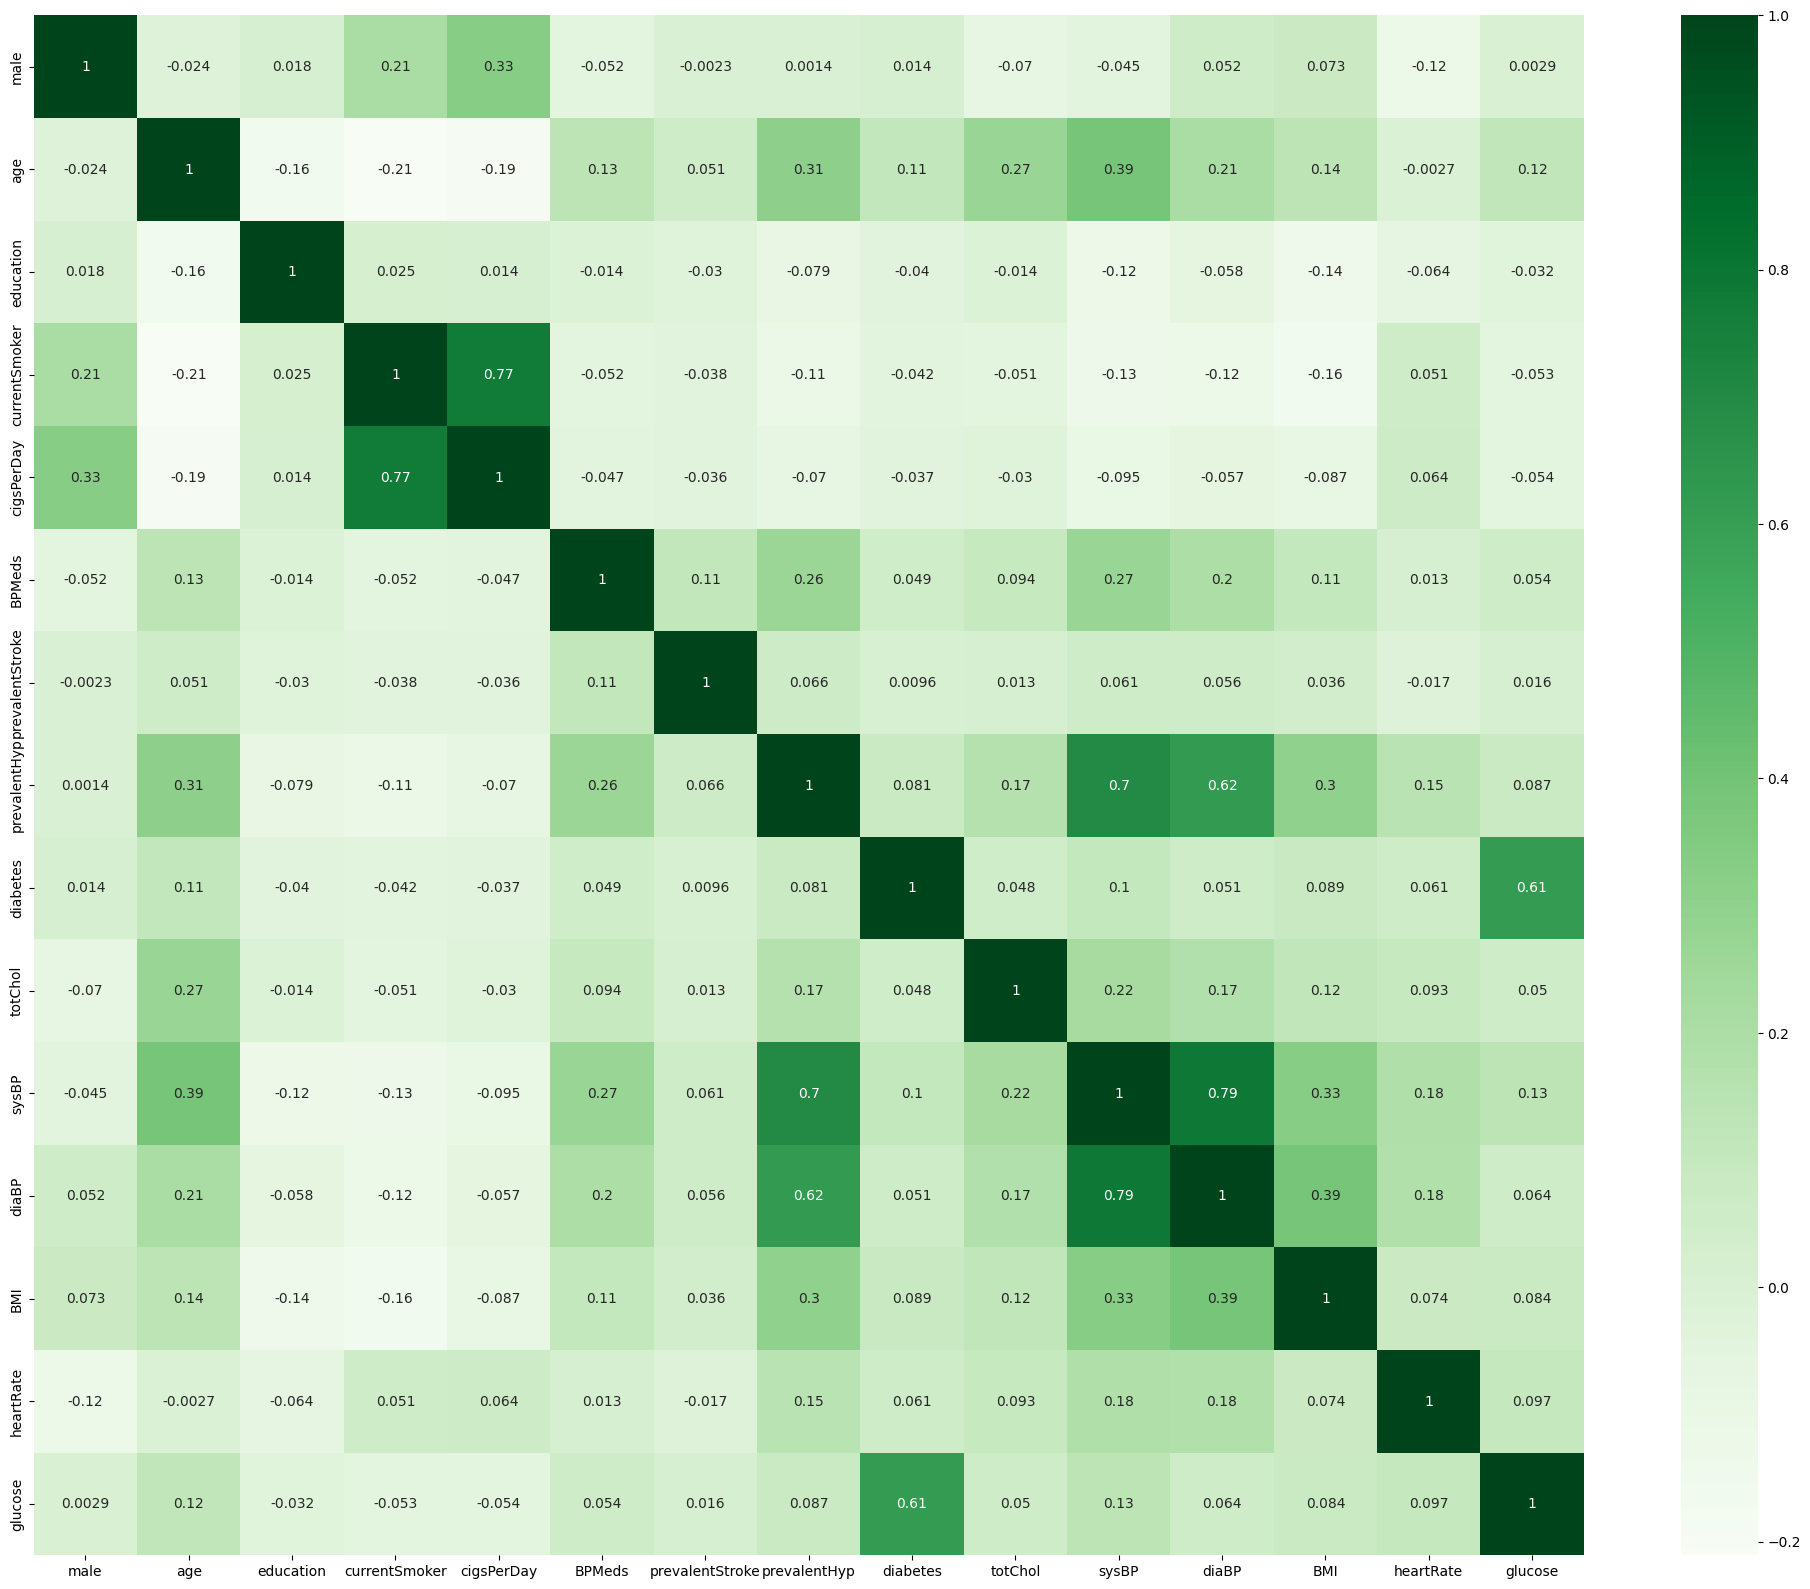

In [ ]:
corr = heart_df.drop(columns= 'TenYearCHD').corr()
fig , ax = plt.subplots(figsize=(25 , 20))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

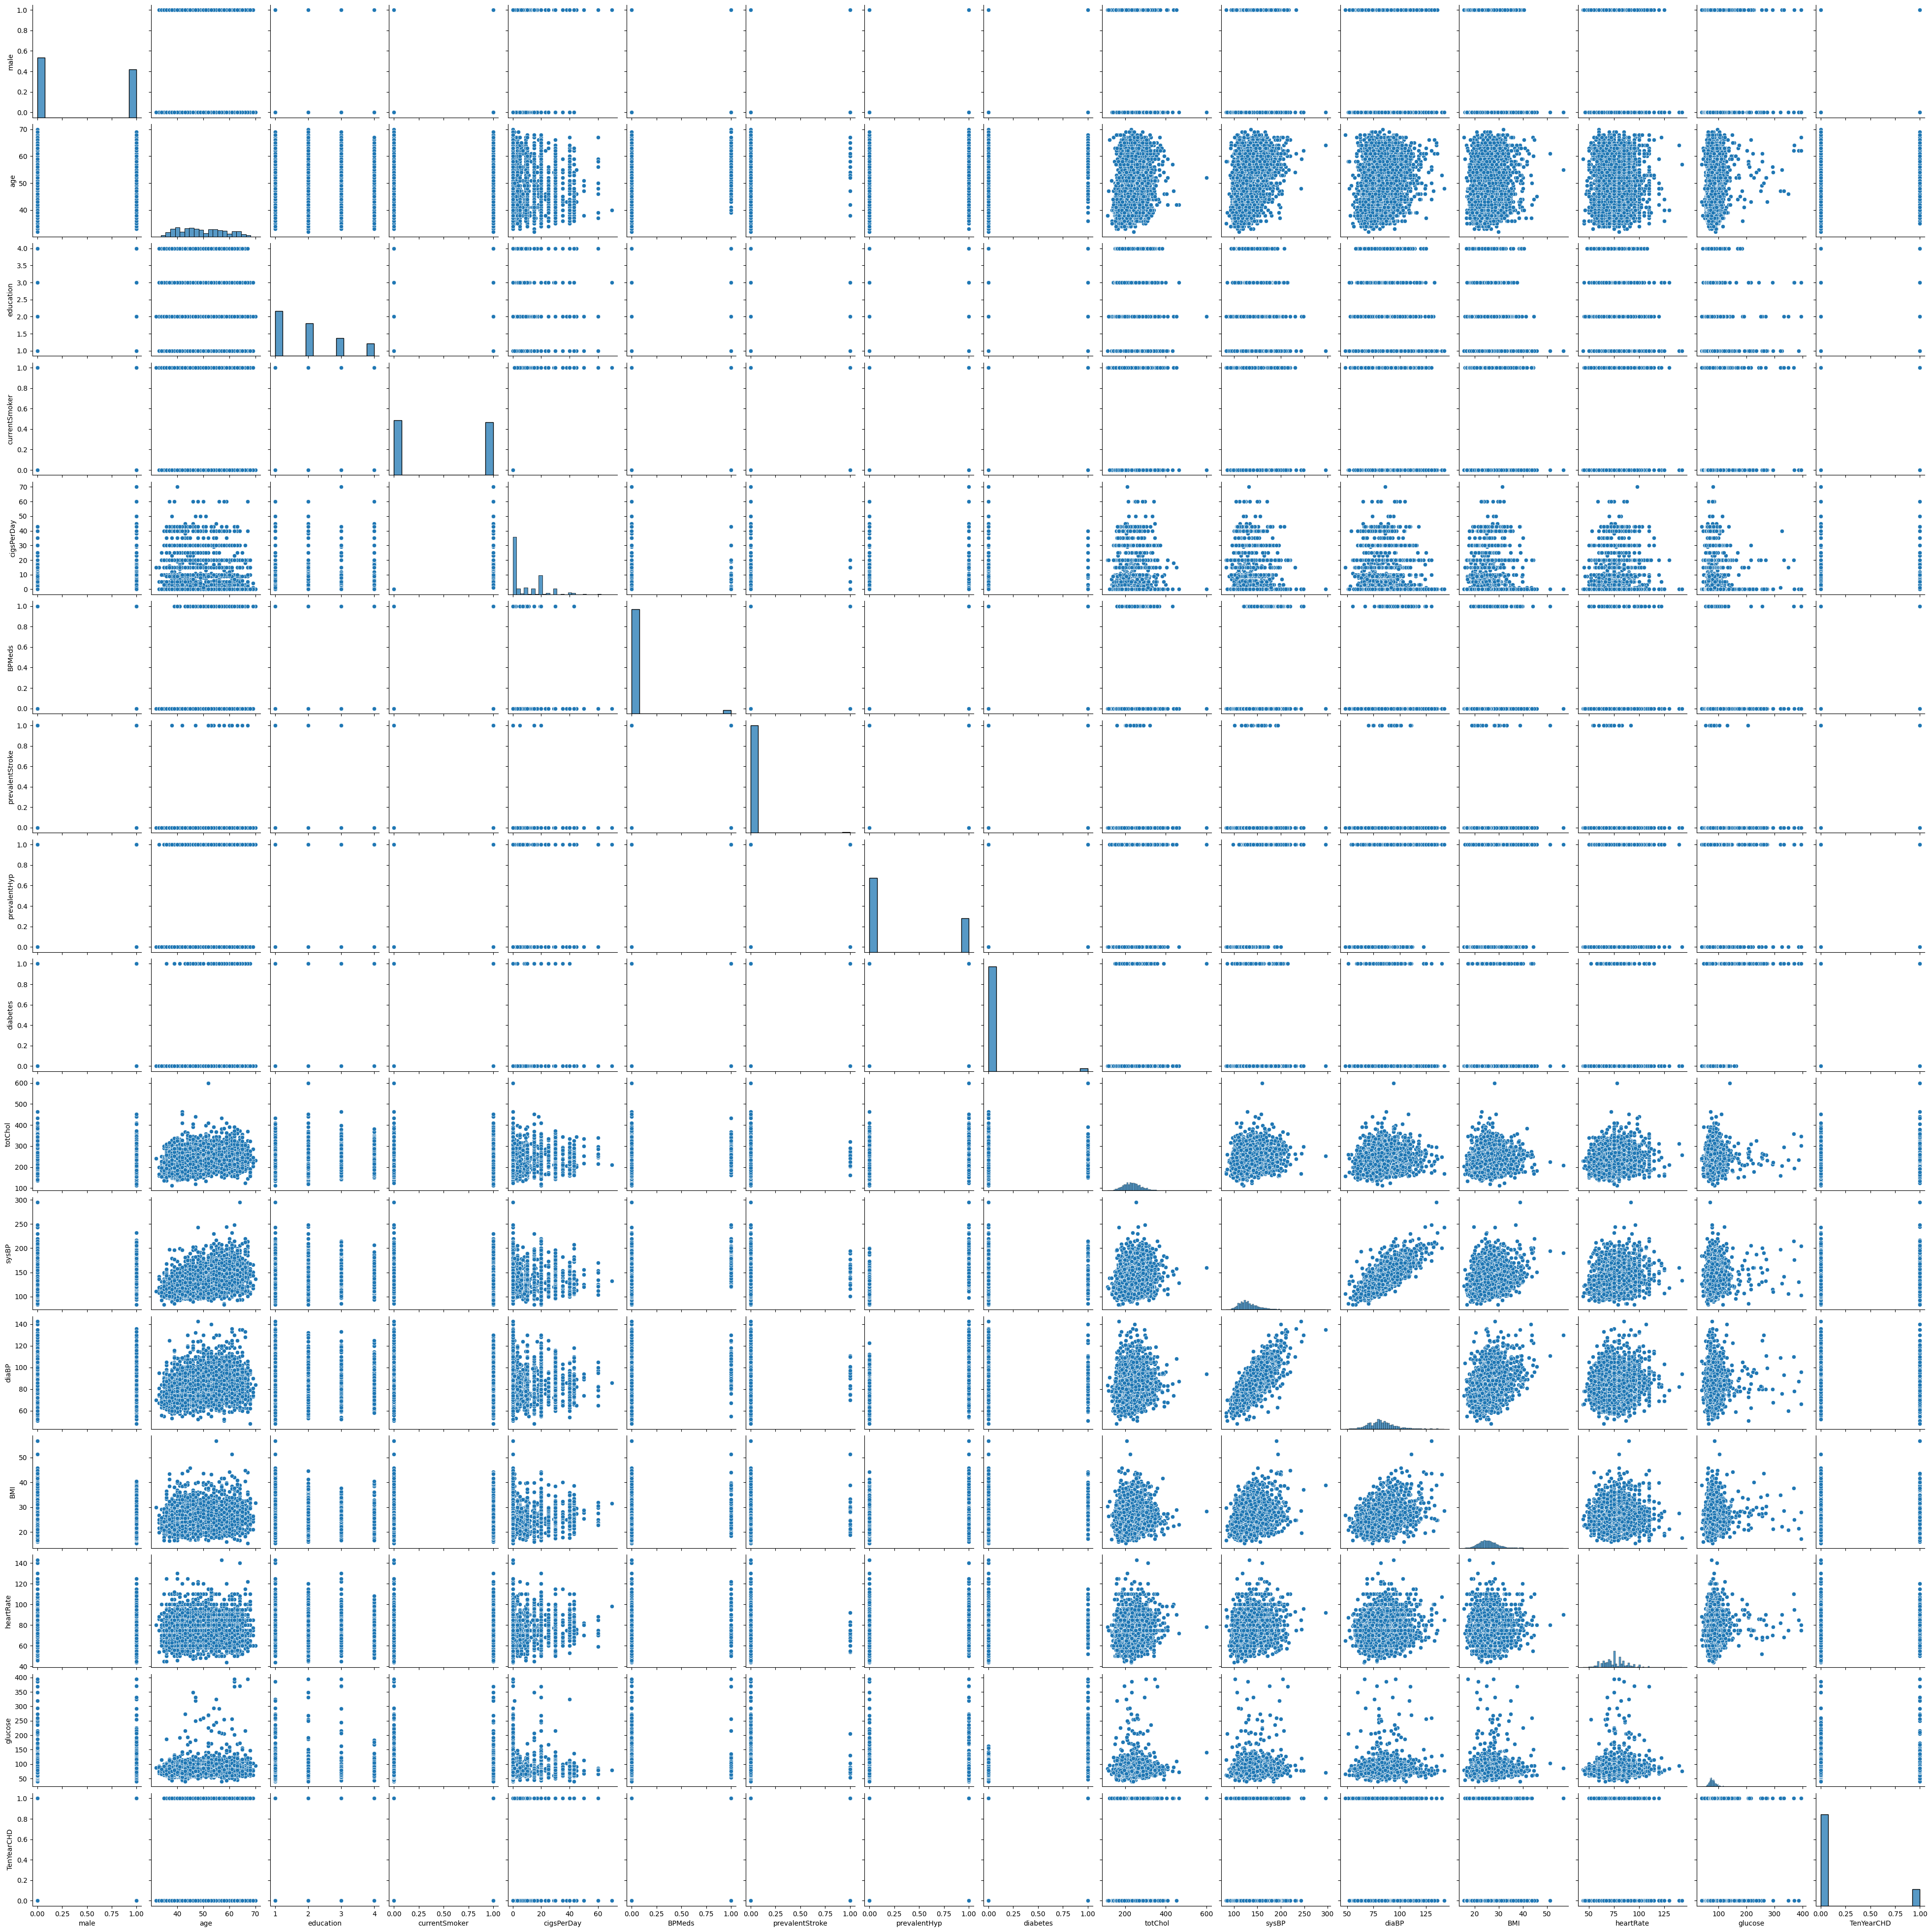

In [ ]:
sns.pairplot(data=heart_df)

# Splitting Data for train and test

In [ ]:
X = heart_df.drop(columns=['TenYearCHD'])
target = heart_df['TenYearCHD']

X_train , X_test , y_train , y_test = train_test_split(X ,target ,test_size=0.2 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2926, 15)
y_train shape: (2926,)
X_test shape: (732, 15)
y_test shape: (732,)


# Baseline Model

In [ ]:
dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(X_train, y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.8333


# Logistic Regression Model

In [ ]:
LR_model = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(),
    LogisticRegression()
)
LR_model.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
# get predictions for training and testing data
y_training_pred = LR_model.predict(X_train)
y_testing_pred = LR_model.predict(X_test)

#get accuracy for training and testing
training_acc = accuracy_score(y_train, y_training_pred)
testing_acc = accuracy_score(y_test, y_testing_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.8558
Testing accuracy :  0.8402


# Confusion Matrix

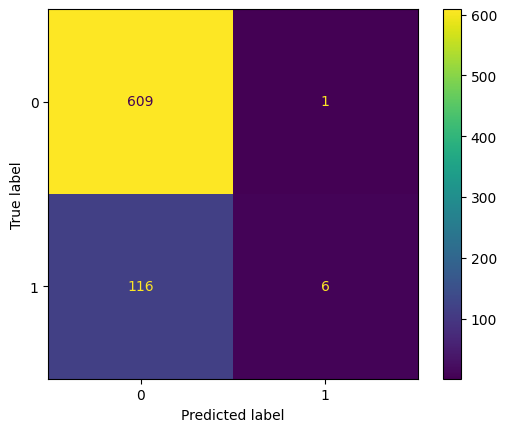

In [ ]:
ConfusionMatrixDisplay.from_estimator(LR_model,X_test,y_test);

In [ ]:
print(classification_report(y_test , LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       610
           1       0.86      0.05      0.09       122

    accuracy                           0.84       732
   macro avg       0.85      0.52      0.50       732
weighted avg       0.84      0.84      0.78       732



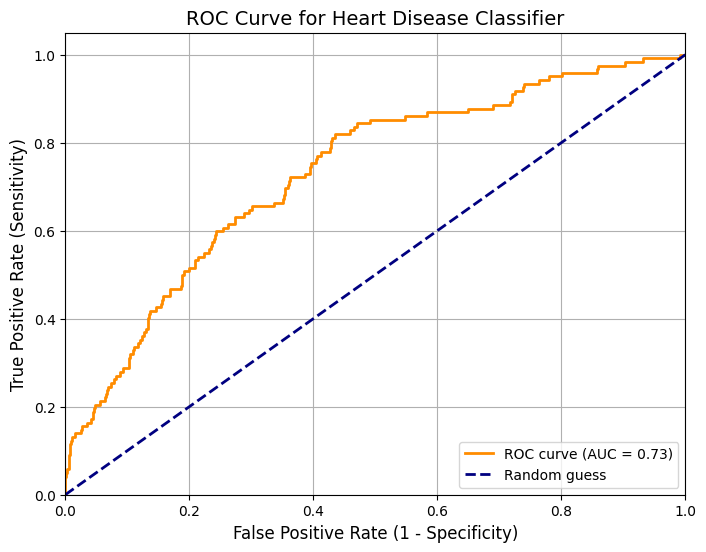

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (1)
y_test_probs = LR_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
roc_auc = roc_auc_score(y_test, y_test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curve for Heart Disease Classifier', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
